# Cities of Summer

This started out as a classroom exercise for a General Assembly introductory programming course, and
each year I take a look at it and make some changes.

So let's look at how much of the year is winter, and how much is summer.

In [1]:
import pandas as pd
import matplotlib
import io
%matplotlib inline
import seaborn
seaborn.set(style="whitegrid")

In [2]:
last_full_year = 2018

In [3]:
def get_temperature_ranges(city_max_name, city_min_name):
    import zipfile
    z1 = zipfile.ZipFile(city_max_name + '.zip')
    z2 = zipfile.ZipFile(city_min_name + '.zip')

    maximums = pd.read_csv(io.BytesIO(z1.read(city_max_name + '_Data.csv')), parse_dates=[['Year','Month','Day']])
    minimums = pd.read_csv(io.BytesIO(z2.read(city_min_name + '_Data.csv')), parse_dates=[['Year','Month','Day']])

    maximums.columns = ['Date','Code','Station','Max','Accum','Quality']
    just_maximums = maximums[['Date','Max']]
    minimums.columns = ['Date','Code','Station','Min','Accum','Quality']
    just_minimums = minimums[['Date','Min']]
    temperatures = just_minimums[['Date', 'Min']].merge(
                   just_maximums[['Date', 'Max']],
        left_on='Date',
        right_on="Date"
    )
    temperatures['Year'] = temperatures.Date.dt.year
    return temperatures

To explain that -- we read the data we downloaded from the Bureau. Then we extracted the data files
(there's are boring note files in there as well). Each data file has 8 columns, but we smashed Year, Month and
Day together into one, leaving us with 6 columns.

Only columns 1 and 4 are interesting (the date and the temperature). We merged this data from the two files
together (temperatures) keying off the date in them.

Then we added a column for the year number, because we'll need that and it was easy to derive it.

In [4]:
def get_cold_and_hot_days(temperatures, threshold):
    threshold_str = str(threshold)
    extremes = pd.DataFrame({
        'minimum_above_' + threshold_str:
           temperatures[(temperatures.Min > threshold) & (temperatures.Year <= last_full_year)
                       ].groupby('Year').Min.count().fillna(0),
        'maximum_below_' + threshold_str: 
           temperatures[(temperatures.Max < threshold) & (temperatures.Year <= last_full_year)
                       ].groupby('Year').Max.count().fillna(0)
    }).fillna(0)
    return extremes

This is a bit simpler -- we are just creating a year-by-year analysis counting the number of days above
and below 20.

## Sydney

Sydney temperatures from the Sydney observatory (station code 066062):

- Maximum temperatures downloaded from http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=066062&p_c=-873070771&p_nccObsCode=122&p_startYear=2018

- Minimum temperatures downloaded from http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=066062&p_c=-873070967&p_nccObsCode=123&p_startYear=2018

The URL seems to change each time I request it, so I need to be a bit smarter about automating that bit.

### How hot?

It "feels like" winter when the maximum temperature is below 20. It means you have the heater on
(or it means I need to light a fire). It feels like summer when the minimum temperature is above 20; 
you have to sleep with at least a fan and you can dive into the pool or sea any time of the data or
night and it isn't uncomfortable.

In [5]:
SYDNEY_MAX = 'IDCJAC0010_066062_1800'
SYDNEY_MIN = 'IDCJAC0011_066062_1800'

sydney_temperatures = get_temperature_ranges(SYDNEY_MAX, SYDNEY_MIN)
sydney_extremes = get_cold_and_hot_days(sydney_temperatures, 20)

I was born in 1972, and my mother said that being pregnant with me that summer was awful, and the summer at the
beginning of 1973 was terrible. We spent a lot of time in the pool that summer.

So let's look at 1972 and 1973, 50 years ago and 100 years ago, and the most recent few years.


In [6]:
sydney_extremes.loc[sydney_extremes.index.isin([1972,1973, last_full_year-50, last_full_year-100, 1859,
                                         last_full_year, last_full_year-1, last_full_year-2])]

,minimum_above_20,maximum_below_20
Year,,
1859,1,146
1918,7,127
1968,41,120
1972,21,119
1973,48,109
2016,70,79
2017,81,87
2018,61,98


So yes, she wasn't wrong -- 1973 was pretty incredible. It's just that 2018 (which was pretty mild) was even worse.

Let's just put that in perspective. 100 years ago, sweltering days where the temperature never got below
20 were really rare. Here's the complete list of them...

In [7]:
sydney_temperatures[(sydney_temperatures.Min > 20) & (sydney_temperatures.Year == last_full_year-100)].set_index('Date')

,Min,Max,Year
Date,,,
1918-01-15,20.6,25.8,1918
1918-01-22,20.6,26.7,1918
1918-01-25,20.1,26.2,1918
1918-02-04,21.6,27.2,1918
1918-02-10,21.1,24.9,1918
1918-02-12,20.8,27.3,1918
1918-03-05,20.5,26.9,1918


In [279]:
sydney_temperatures[(sydney_temperatures.Min > 20) & (sydney_temperatures.Year == 2018)].set_index("Date")

,Min,Max,Year
Date,,,
2018-01-01,20.5,29.8,2018
2018-01-02,20.5,27.0,2018
2018-01-06,20.3,29.8,2018
2018-01-07,22.4,43.4,2018
2018-01-08,22.0,31.9,2018
2018-01-09,22.1,30.2,2018
2018-01-12,21.6,27.2,2018
2018-01-13,23.2,34.3,2018
2018-01-22,21.5,29.6,2018


So is there a trend? Here's a chart since records began:

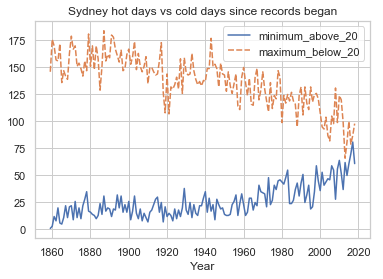

In [283]:
#matplotlib.pyplot.figure(figsize=(20,8))
seaborn.lineplot(data=sydney_extremes)
matplotlib.pyplot.title("Sydney hot days vs cold days since records began")
None

So is Sydney becoming the city of endless Summer? 

- Who wants to take a bet on the first year when there are more summer-like days than winter-like days? 

- When do you think the chart below is going to hit 0?

I'm guessing around 2020.

We'll declare Sydney the **city of summer** from 2020 onwards.

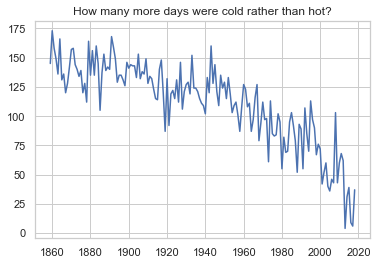

In [20]:
summer_vs_winter = sydney_extremes.maximum_below_20 - sydney_extremes.minimum_above_20
seaborn.lineplot(data=summer_vs_winter)
matplotlib.pyplot.title("How many more days were cold rather than hot?")
None

But let's not be hasty -- what does the post world-war 2 trend look like?

A RANSAC regressor (used because of the noisy signal) suggests around 2050.

<Figure size 1440x576 with 0 Axes>

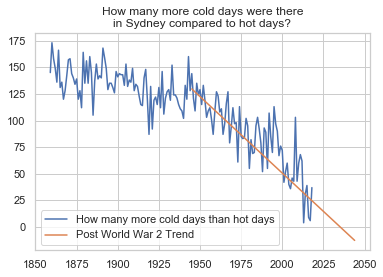

In [273]:
import sklearn.linear_model
matplotlib.pyplot.figure(figsize=(20,8))
predictor = sklearn.linear_model.RANSACRegressor()
post_1945 = summer_vs_winter[summer_vs_winter.index > 1945]
predictor.fit(post_1945.reset_index()[['Year']], post_1945)

prediction_range = list(range(1945, 2045))
chart_df = pd.DataFrame({
    'How many more cold days than hot days' : summer_vs_winter,
    'Post World War 2 Trend': pd.Series(index=prediction_range, data=predictor.predict([[x] for x in prediction_range]))
})
chart_df.plot()
matplotlib.pyplot.title("How many more cold days were there\nin Sydney compared to hot days?")
None

### Digression on maximums

18th January 2013 was when we saw the hottest temperature in Sydney (45.8 degrees). 3 out of the top 5 hottest
days ever recorded happened since 2000.

In [102]:
sydney_temperatures.set_index('Date').sort_values('Max').dropna().tail(5)

,Min,Max,Year
Date,,,
1896-01-13,24.9,42.5,1896
2018-01-07,22.4,43.4,2018
2006-01-01,23.3,44.2,2006
1939-01-14,21.9,45.3,1939
2013-01-18,21.7,45.8,2013


Plotting the hottest day of the year isn't super-informative. You can see a bit of a difference after 2000, and
post 1900 seems warmer than pre 1900.

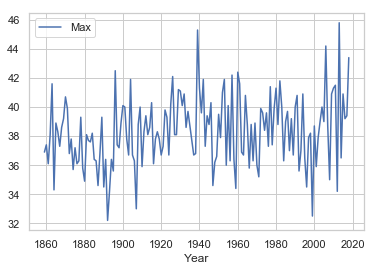

In [103]:
sydney_annual_max = sydney_temperatures[['Max', 'Year']].groupby('Year').max()
seaborn.lineplot(data=sydney_annual_max)

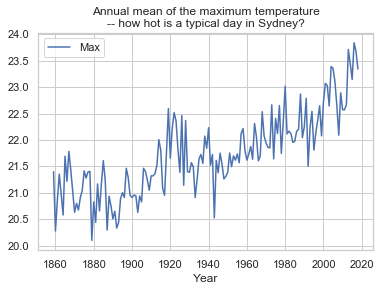

In [261]:
#matplotlib.pyplot.figure(figsize=(20,8))
sydney_average_max_temperature = sydney_temperatures[['Max', 'Year']].groupby('Year').mean()
seaborn.lineplot(data=sydney_average_max_temperature)
matplotlib.pyplot.title("Annual mean of the maximum temperature\n-- how hot is a typical day in Sydney?")
None

In [240]:
predictor = sklearn.linear_model.LinearRegression()
non_null_sydney_temperatures = sydney_temperatures[sydney_temperatures.Max.notnull()]
predictor.fit(non_null_sydney_temperatures[['Year']], non_null_sydney_temperatures.Max)
predictor.coef_

array([0.01341704])

Sydney is getting warmer a bit slower than global models predict. If we take the whole 
historical record, we're only gaining one degree each century.

But what if we just look at post world war 2?

In [263]:
sydney_max_predictor = sklearn.linear_model.LinearRegression()
recent_sydney_temperatures = sydney_temperatures[(sydney_temperatures.Max.notnull()) & (sydney_temperatures.Year > 1944)]
sydney_max_predictor.fit(recent_sydney_temperatures[['Year']], recent_sydney_temperatures.Max)
sydney_max_predictor.coef_


array([0.02333285])

In [264]:
1/sydney_max_predictor.coef_[0]

42.8580367956858

Yup, warming has been happening faster. **We'll gain one degree celsius every 40-50 years.**

### And what about minimums?

It used to get down to below 3 degrees celsius in Sydney

In [110]:
sydney_temperatures.set_index('Date').sort_values('Min').dropna().head(15)

,Min,Max,Year
Date,,,
1932-06-22,2.1,17.2,1932
1861-07-08,2.2,10.6,1861
1932-06-23,2.2,14.1,1932
1890-07-12,2.2,12.1,1890
1872-08-03,2.7,16.8,1872
1862-07-26,2.7,15.1,1862
1874-07-17,2.7,15.4,1874
1970-07-16,2.7,18.2,1970
1862-08-05,2.7,15.1,1862


But that hasn't happened in my lifetime, and I'm old...

In [114]:
sydney_temperatures[sydney_temperatures.Min < 3]

,Date,Min,Max,Year
192,1859-07-12,2.8,15.3,1859
919,1861-07-08,2.2,10.6,1861
1278,1862-07-02,2.7,11.1,1862
1302,1862-07-26,2.7,15.1,1862
1312,1862-08-05,2.7,15.1,1862
4963,1872-08-03,2.7,16.8,1872
5676,1874-07-17,2.7,15.4,1874
11515,1890-07-12,2.2,12.1,1890
13338,1895-07-09,2.7,13.2,1895
25765,1929-07-18,2.9,17.2,1929


The trend on minimum temperatures is a bit easier to see.

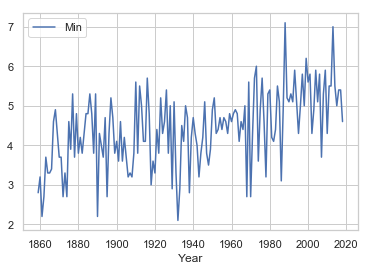

In [111]:
sydney_annual_min = sydney_temperatures[['Min', 'Year']].groupby('Year').min()
seaborn.lineplot(data=sydney_annual_min)

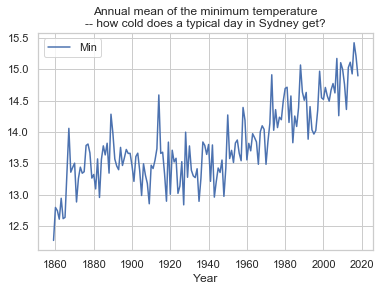

In [262]:
sydney_average_min_temperature = sydney_temperatures[['Min', 'Year']].groupby('Year').mean()
seaborn.lineplot(data=sydney_average_min_temperature)
matplotlib.pyplot.title("Annual mean of the minimum temperature\n-- how cold does a typical day in Sydney get?")
None

In [241]:
predictor = sklearn.linear_model.LinearRegression()
non_null_sydney_temperatures = sydney_temperatures[sydney_temperatures.Min.notnull()]
predictor.fit(non_null_sydney_temperatures[['Year']], non_null_sydney_temperatures.Min)
predictor.coef_

array([0.0104193])

In [243]:
sydney_min_predictor = sklearn.linear_model.LinearRegression()
recent_sydney_temperatures = sydney_temperatures[(sydney_temperatures.Min.notnull()) & (sydney_temperatures.Year > 1944)]
sydney_min_predictor.fit(recent_sydney_temperatures[['Year']], recent_sydney_temperatures.Min)
sydney_min_predictor.coef_

array([0.02027609])

So both the minimum and maximum temperatures are increasing. It doesn't scream out in the combined graph though
(it's still there...)

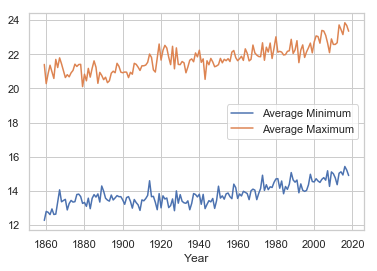

In [255]:
sydney_min_max_df = pd.DataFrame({
    'Average Minimum': sydney_average_min_temperature.Min,
    'Average Maximum': sydney_average_max_temperature.Max
})
sydney_min_max_df.plot()

## Melbourne

Weather data from Melbourne is surprisingly bad. The longest run I can find is from 
Laverton RAAF base. (Weather station 087031)

- Maximum http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=087031&p_c=-1515112195&p_nccObsCode=122&p_startYear=2018

- Minimum http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=087031&p_c=-1515112391&p_nccObsCode=123&p_startYear=2018

The earliest full year with minimums and maximums is 1947.

Melbourne is 1000km closer to Antarctica than Sydney. For Melbourne to stay above 15 degrees even through
the night means something odd is happening.

In [11]:
MELBOURNE_MAX = 'IDCJAC0010_087031_1800'
MELBOURNE_MIN = 'IDCJAC0011_087031_1800'

melbourne_temperatures = get_temperature_ranges(MELBOURNE_MAX, MELBOURNE_MIN)
melbourne_temperatures = melbourne_temperatures[melbourne_temperatures.Year >= 1947]
melbourne_extremes = get_cold_and_hot_days(melbourne_temperatures, 15)

It's happening are more often now, though.

And if there are spring and autumn days above 15 degrees, something's wrong.

In [12]:
melbourne_extremes.loc[melbourne_extremes.index.isin([1947, last_full_year-50, last_full_year-100,
                                         last_full_year, last_full_year-1, last_full_year-2])]

,minimum_above_15,maximum_below_15
Year,,
1947,30,95
1968,43,99
2016,74,72
2017,66,69
2018,64,72


Here's the trend for Melbourne.

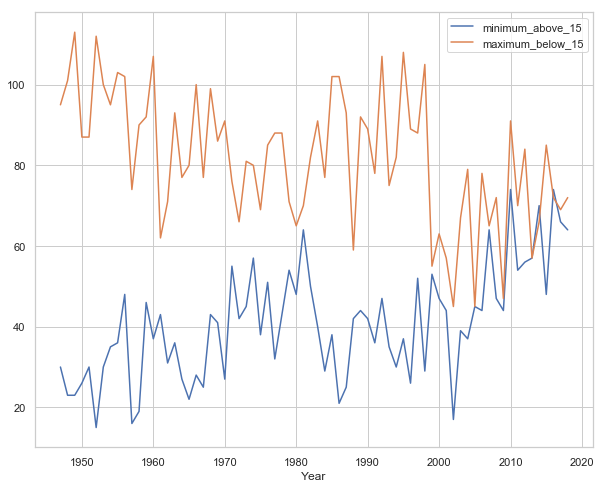

In [13]:
melbourne_extremes.plot(figsize=(10,8))

Even if we use the same threshold as Sydney, there's still a bit of a visible trend where
Melbourne is trying to turn into Sydney. It's a bit clearer with rolling average -- you
can see that around the year 2000 that cool days (the orange line) are getting rarer.

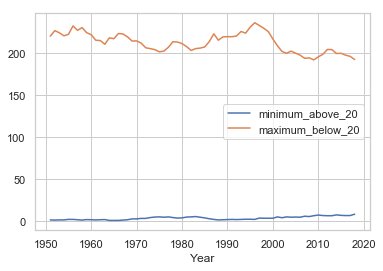

In [14]:
melbourne_extremes20 = get_cold_and_hot_days(melbourne_temperatures, threshold=20)
melbourne_extremes20.rolling(5).mean().plot()

### Melbourne maximums

In [107]:
melbourne_temperatures.set_index('Date').sort_values('Max').dropna().tail(10)

,Min,Max,Year
Date,,,
2005-12-31,14.8,44.3,2005
2014-01-14,16.2,44.4,2014
2014-01-17,23.0,44.7,2014
2010-01-11,15.3,44.7,2010
2009-01-29,24.6,44.8,2009
2009-01-30,23.1,44.8,2009
1968-01-31,17.8,44.9,1968
2003-01-25,16.0,45.0,2003
1983-02-08,18.0,45.0,1983


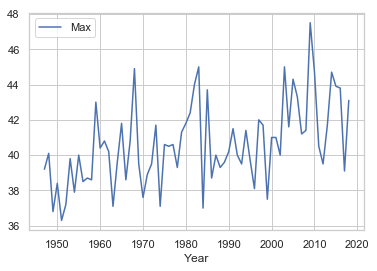

In [108]:
melbourne_annual_max = melbourne_temperatures[['Max', 'Year']].groupby('Year').max()
seaborn.lineplot(data=melbourne_annual_max)

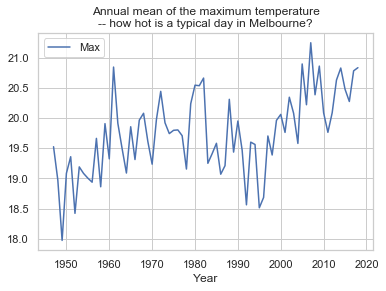

In [275]:
#matplotlib.pyplot.figure(figsize=(20,8))
melbourne_average_max_temperature = melbourne_temperatures[['Max', 'Year']].groupby('Year').mean()
seaborn.lineplot(data=melbourne_average_max_temperature)
matplotlib.pyplot.title("Annual mean of the maximum temperature\n-- how hot is a typical day in Melbourne?")
None

### Melbourne minimums

The top 20 coldest days in Melbourne's history all happened before 2000. It just doesn't get that cold any more.

In [131]:
melbourne_temperatures.set_index('Date').sort_values('Min').dropna().head(20)

,Min,Max,Year
Date,,,
1984-07-15,-4.4,10.0,1984
1982-07-21,-4.4,11.4,1982
1969-06-16,-3.3,10.6,1969
1997-08-05,-3.2,17.5,1997
1969-06-17,-3.2,13.4,1969
1986-06-30,-3.1,13.2,1986
1994-07-01,-3.1,12.7,1994
1947-08-22,-2.8,10.6,1947
1956-08-02,-2.8,12.7,1956


Last century it got below freezing reasonably often, but it's getting a lot rarer.

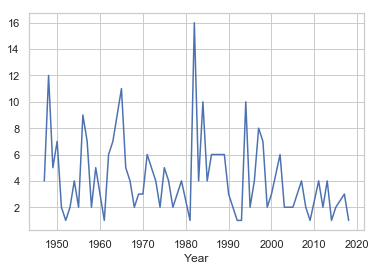

In [128]:
melbourne_temperatures[melbourne_temperatures.Min < 0].groupby('Year').Min.count().plot()

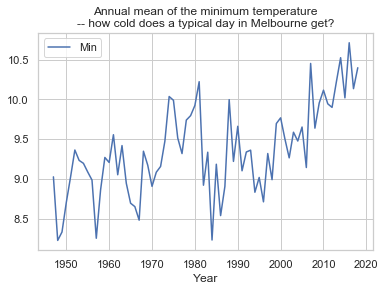

In [276]:
melbourne_average_min_temperature = melbourne_temperatures[['Min', 'Year']].groupby('Year').mean()
seaborn.lineplot(data=melbourne_average_min_temperature)
matplotlib.pyplot.title("Annual mean of the minimum temperature\n-- how cold does a typical day in Melbourne get?")
None

In [277]:
melbourne_min_predictor = sklearn.linear_model.LinearRegression()
recent_melbourne_temperatures = melbourne_temperatures[(melbourne_temperatures.Min.notnull()) & (melbourne_temperatures.Year > 1944)]
melbourne_min_predictor.fit(recent_melbourne_temperatures[['Year']], recent_melbourne_temperatures.Min)
melbourne_min_predictor.coef_


array([0.0167069])

In [278]:
1/melbourne_min_predictor.coef_[0]

59.85551247392197

## Brisbane

I couldn't find any long-term measurements for Brisbane. Two long-term data sets are:

- Cape Morton 

- Murwillumbah


### Cape Morton

The Cape Morton lighthouse (station 040043) is about 60km away from Brisbane and (obviously) on the coast which
means it is much cooler. It's also the longest record of temperatures
around Brisbane, dating back to 1910. They look pretty dodgy until 1920 though.

- Minimums: http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=040043&p_c=-320921768&p_nccObsCode=123&p_startYear=2018

- Maximums: http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=040043&p_c=-320921572&p_nccObsCode=122&p_startYear=2018

In [15]:
CAPE_MORTON_MAX = 'IDCJAC0010_040043_1800'
CAPE_MORTON_MIN = 'IDCJAC0011_040043_1800'

cape_morton_temperatures = get_temperature_ranges(CAPE_MORTON_MAX, CAPE_MORTON_MIN)
cape_morton_extremes = get_cold_and_hot_days(cape_morton_temperatures, 20)

Still sticking with the 20 degree threshold... one hundred years ago it was twice as common
to have a below 20-degree day in Brisbane. 

In [16]:
cape_morton_extremes.loc[cape_morton_extremes.index.isin([last_full_year-50, last_full_year-100, 1859,
                                         last_full_year, last_full_year-1, last_full_year-2])]

,minimum_above_20,maximum_below_20
Year,,
1918,107,68
1968,119,71
2016,183,31
2017,162,24
2018,134,36


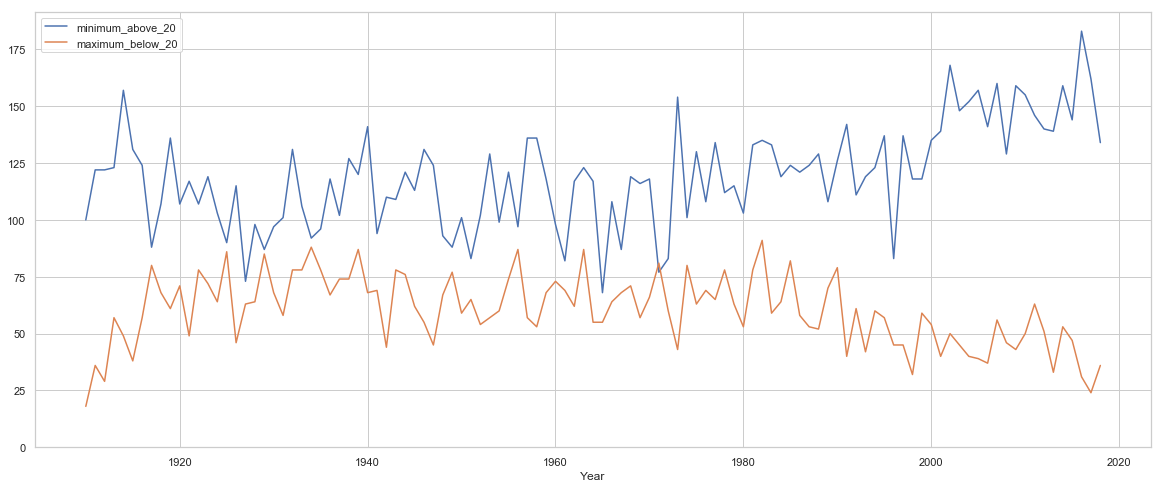

In [17]:
cape_morton_extremes.plot(figsize=(20,8), ylim=0)

### CAPE MORTON maximums

In [135]:
cape_morton_temperatures.set_index('Date').sort_values('Max').dropna().tail()

,Min,Max,Year
Date,,,
2018-01-14,25.4,33.1,2018
1944-12-11,22.8,33.3,1944
1988-11-24,23.4,33.4,1988
1940-12-23,23.3,35.0,1940
2002-12-06,24.5,35.4,2002


### Murwillumbah

Murwillumbah is approximately 100km south of Brisbane, so just a teeny bit cooler. Complete records only date back to
1973.

In [140]:
MURWILLUMBAH_MAX = 'IDCJAC0010_058158_1800'
MURWILLUMBAH_MIN = 'IDCJAC0011_058158_1800'

murwillumbah_temperatures = get_temperature_ranges(MURWILLUMBAH_MAX, MURWILLUMBAH_MIN)
murwillumbah_temperatures = murwillumbah_temperatures[murwillumbah_temperatures.Year > 1972]
murwillumbah_extremes = get_cold_and_hot_days(murwillumbah_temperatures, 20)

The spread for Murwillumbah is growing -- it used to be about a balance between cold and hot days, now it's
very clear that there are more hot days than cold days.

**Sydney's hot vs cold days in the next few years will be about the same as Murwillumbah in the 1970s**

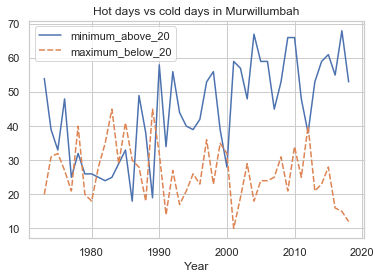

In [282]:
seaborn.lineplot(data=murwillumbah_extremes)
matplotlib.pyplot.title("Hot days vs cold days in Murwillumbah")
None

### Murwillumbah maximums

I don't think we have enough data to see much from this.

In [146]:
murwillumbah_temperatures.set_index('Date').sort_values('Max').dropna().tail(10)

,Min,Max,Year
Date,,,
2009-11-17,19.1,39.6,2009
1981-12-07,20.6,39.7,1981
2002-01-02,23.7,40.2,2002
1990-12-23,22.5,40.5,1990
2014-01-04,24.1,40.6,2014
1994-01-04,20.7,40.7,1994
2001-12-25,22.2,40.7,2001
2004-02-21,25.2,40.9,2004
1994-01-06,18.0,41.2,1994


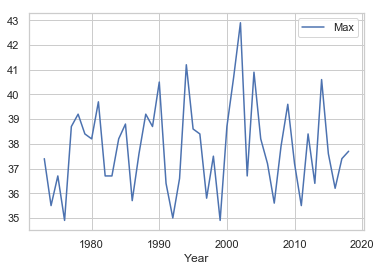

In [148]:
murwillumbah_annual_max = murwillumbah_temperatures[['Max', 'Year']].groupby('Year').max()
seaborn.lineplot(data=murwillumbah_annual_max)

#### Murwillumbah minimums

Not much to see here either.

In [150]:
murwillumbah_temperatures.set_index('Date').sort_values('Min').dropna().head(20)

,Min,Max,Year
Date,,,
2008-08-15,-1.4,23.2,2008
2008-08-10,-1.0,19.9,2008
1981-06-25,-0.3,19.0,1981
2008-08-11,-0.2,18.2,2008
1982-06-20,0.0,20.6,1982
2008-08-12,0.1,19.3,2008
2008-08-16,0.1,23.4,2008
1981-07-04,0.2,21.5,1981
2018-08-22,0.3,24.0,2018


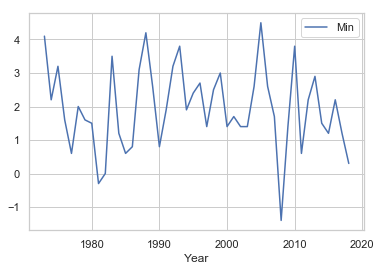

In [152]:
murwillumbah_annual_min = murwillumbah_temperatures[['Min', 'Year']].groupby('Year').min()
seaborn.lineplot(data=murwillumbah_annual_min)

# Alice Springs

Alice Springs has data all the way back to World War 2. It's right in the middle of the desert, 
thousands of kilometres from the coast.

- Minimum http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=015590&p_c=-48843019&p_nccObsCode=123&p_startYear=2018
- Maximum http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=015590&p_c=-48842823&p_nccObsCode=122&p_startYear=2018

In [157]:
ALICE_MAX = 'IDCJAC0010_015590_1800'
ALICE_MIN = 'IDCJAC0011_015590_1800'

alice_temperatures = get_temperature_ranges(ALICE_MAX, ALICE_MIN)
alice_temperatures = alice_temperatures[alice_temperatures.Year > 1941]
alice_extremes = get_cold_and_hot_days(alice_temperatures, 20)

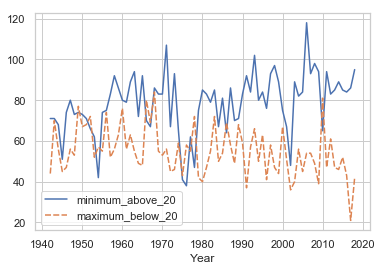

In [195]:
#matplotlib.pyplot.figure(figsize=(20,8))
seaborn.lineplot(data=alice_extremes)

I didn't expect this to be so obvious. Here's a plot where we try to answer "what was a typical daily maximum
in Alice Springs like?"

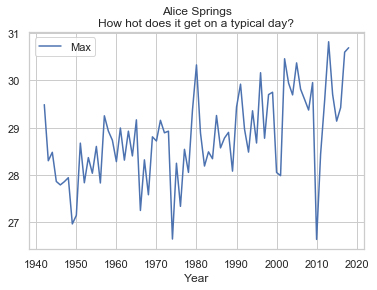

In [266]:
alice_average_temperature = alice_temperatures[['Max', 'Year']].groupby('Year').mean()
seaborn.lineplot(data=alice_average_temperature)
matplotlib.pyplot.title("Alice Springs\nHow hot does it get on a typical day?")
None

We can smooth it out by looking at the average over each preceeding decade.

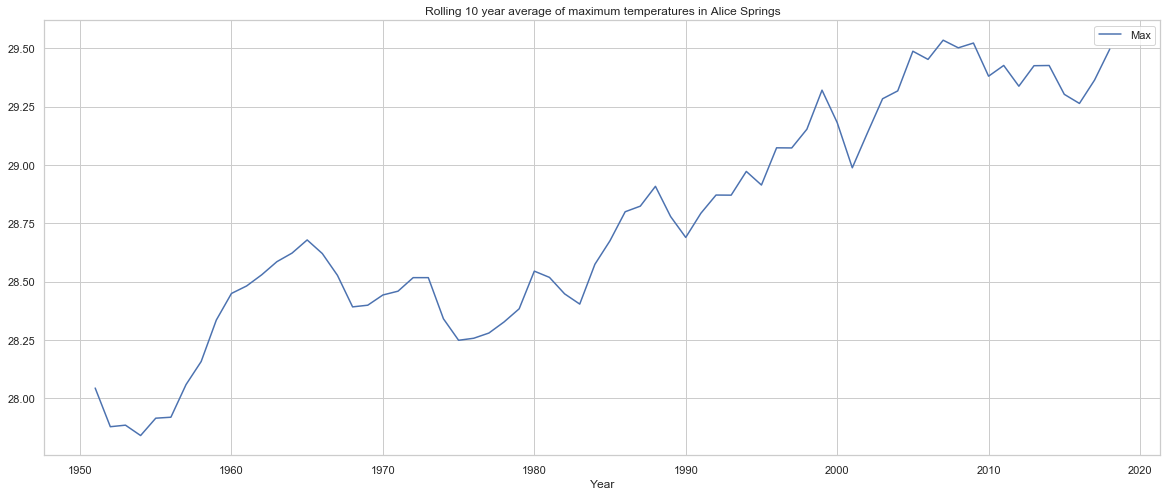

In [203]:
matplotlib.pyplot.figure(figsize=(20,8))
seaborn.lineplot(data=alice_average_temperature.rolling(10).mean())
matplotlib.pyplot.title("Rolling 10 year average of maximum temperatures in Alice Springs")
None

If it's that obvious, regression is going to tell us how much of an effect is happening. It turns out that
Theil-Sen and ordinary least squares give roughly similar answers. I suppose that's not unexpected as the
noise will be quite heteroskedastic.

In [267]:
predictor = sklearn.linear_model.LinearRegression()
non_null_alice_temperatures = alice_temperatures[alice_temperatures.Max.notnull()]
predictor.fit(non_null_alice_temperatures[['Year']], non_null_alice_temperatures.Max)
predictor.coef_

array([0.02288228])

In [268]:
1/predictor.coef_[0]

43.70194014647218

**One degree hotter every 50 years or so.**

Funnily enough, I don't see much of a trend in minimum temperatures.

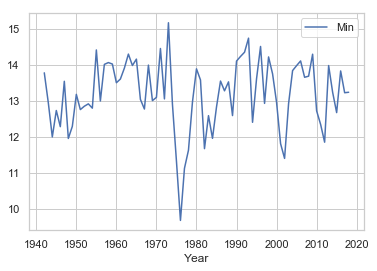

In [196]:
seaborn.lineplot(data=alice_temperatures[['Min', 'Year']].groupby('Year').mean())

### Alice maximums

In [177]:
alice_temperatures.set_index('Date').sort_values('Max').dropna().tail(5)

,Min,Max,Year
Date,,,
2014-11-13,16.4,44.9,2014
2004-01-06,27.3,45.0,2004
1960-01-02,30.6,45.0,1960
1960-01-03,32.8,45.2,1960
2018-12-29,27.3,45.6,2018


It's hard to miss the Alice Springs maximum temperature trend...

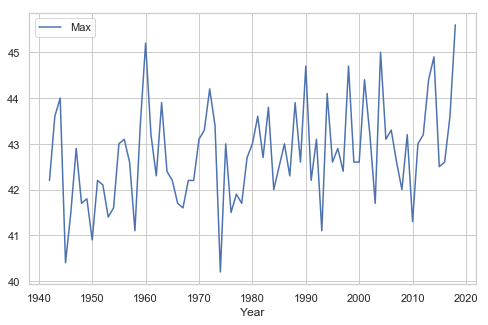

In [192]:
matplotlib.pyplot.figure(figsize=(8,5))
alice_annual_max = alice_temperatures[['Max', 'Year']].groupby('Year').max()
seaborn.lineplot(data=alice_annual_max)

If we plot for each year what the hottest temperature was in the previous decade, you can get a pretty clear
picture -- it would be clearer if it wasn't for those freakishly hot days at the start of 1960.

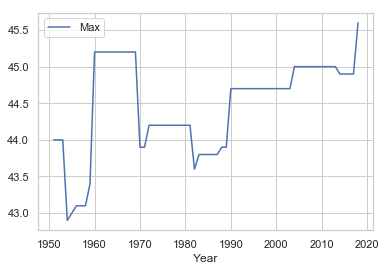

In [189]:
seaborn.lineplot(data=alice_temperatures[['Max', 'Year']].groupby('Year').max().rolling(10).max())

#### Alice minimums

In [180]:
alice_temperatures.set_index('Date').sort_values('Min').dropna().head(15)

,Min,Max,Year
Date,,,
1976-07-17,-7.5,16.8,1976
1976-07-20,-6.7,16.5,1976
1977-07-03,-6.2,17.4,1977
1976-07-21,-6.0,21.2,1976
2002-06-30,-6.0,19.7,2002
1977-07-18,-5.8,18.8,1977
1976-07-19,-5.6,15.3,1976
2002-07-01,-5.6,23.2,2002
1983-07-09,-5.5,17.3,1983


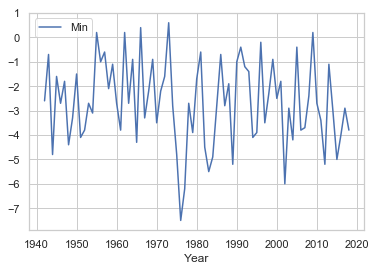

In [181]:
alice_annual_min = alice_temperatures[['Min', 'Year']].groupby('Year').min()
seaborn.lineplot(data=alice_annual_min)